In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Input,BatchNormalization,Dropout,Dense
from tensorflow.keras.models import Model

In [2]:
def create_model(input_shape = (48,48,1),num_classes=7):
    
    input = Input(shape=input_shape)

    x = Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same')(input)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)
	
    x = Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)


    x = Flatten()(x)

    x = Dense(512,activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256,activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(num_classes,activation='softmax')(x)
    return Model(input,x,name='DM_model')

In [3]:
if __name__=='__main__':
    model = create_model()
    model.summary()

Model: "DM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       295

In [4]:
import tensorflow as tf


In [5]:
import tensorflow as tf
tf.keras.utils.plot_model (model, to_file = "model.jpg", show_shapes = True, show_layer_names = True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [6]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        TensorBoard)
from tensorflow.keras.optimizers import Adam

In [7]:
#0 : sadness
#1 : surprise
#2 : hapinesss
#3 : neutre
#4 : fear
#5 disgust
#6 : anger

In [14]:
import datetime
def train():
    log_dir = log_dir = "logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
 
    train_dataset_path=r"C:/Users/FIRAS/Desktop/traitement/images/train" 
    val_dataset_path = r'C:/Users/FIRAS/Desktop/traitement/images/validation'
    test_dataset_path=r"C:/Users/FIRAS/Desktop/traitement/images/test"
    batch_size = 128
    lr = 1e-3
    epochs = 25
    num_classes=7 
    train_datagen = ImageDataGenerator( 
        rescale=1 / 255.0,
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True
       )

    train_generator = train_datagen.flow_from_directory(
        directory=train_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )
    test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,)
        
    valid_generator = test_datagen.flow_from_directory(
        
        directory=val_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )
    test_gen = test_datagen.flow_from_directory(
        directory=test_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )
    model = create_model(num_classes=num_classes)

    model.summary()
    training_weights='./weights'  
    checkpoint_period = ModelCheckpoint(training_weights + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                        monitor='val_loss', save_weights_only=True, save_best_only=False, period=1)
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1) 
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1) # val_loss 
    tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1) 
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='acc',optimizer=optimizer)
    model.fit(train_generator,validation_data=valid_generator,
                       epochs=epochs,callbacks=[tensorboard, early_stopping,checkpoint_period]
                       )
    model.evaluate(test_gen,verbose=1)
    model.save('./model.h5')

In [15]:
if __name__=='__main__':
    train()

Found 28389 images belonging to 7 classes.
Found 6690 images belonging to 7 classes.
Found 808 images belonging to 7 classes.
Model: "DM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 24, 24, 128)       0        

In [1]:
!taskkill /IM "tensorboard.exe" /F
!rmdir /S /Q %temp%\.tensorboard-info

Erreurÿ: le processus "tensorboard.exe" est introuvable.


In [2]:
%load_ext tensorboard
%tensorboard --logdir "logs/fit"

In [16]:
from keras.models import load_model

In [17]:
classifier =load_model(r'.\model.h5')

In [18]:
test_dataset_path=r"C:/Users/FIRAS/Desktop/traitement/images/test"
test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,)
test_gen = test_datagen.flow_from_directory(
        directory=test_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=128,
        shuffle=True,
        seed=42
    )

Found 808 images belonging to 7 classes.


In [19]:
results = classifier.evaluate(test_gen)
preds   = classifier.predict(test_gen)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

7/7 [==============================] - 4s 477ms/step
The current model achieved a categorical accuracy of 54.46%!


In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix

# compute predictions
predictions = classifier.predict(test_gen)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_gen.classes
class_names = test_gen.class_indices.keys()

7/7 [==============================] - 3s 466ms/step


In [21]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

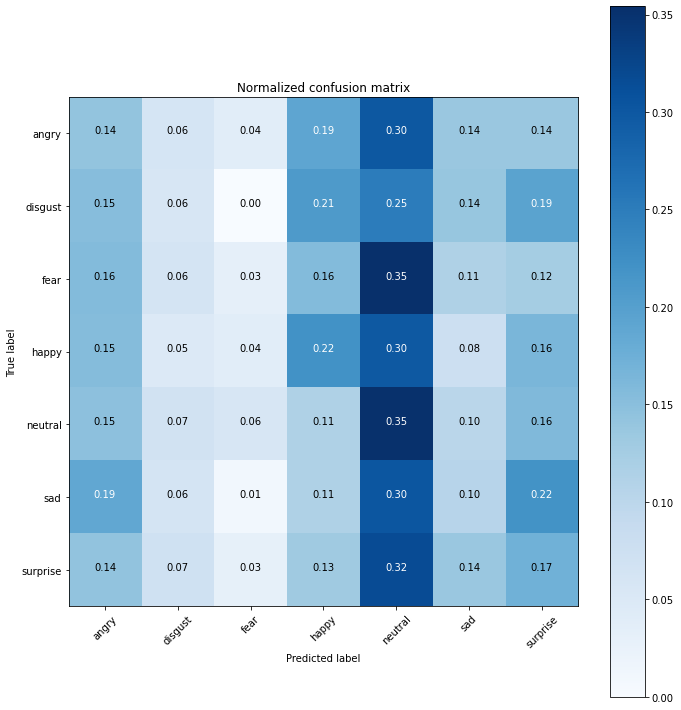

In [22]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()